
مشتری 1 در گیشه 2


C:\Users\ML\AppData\Local\Temp\ipykernel_12516\1664732890.py:173: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = customer_data.resample('M', on='date')['amount'].sum()


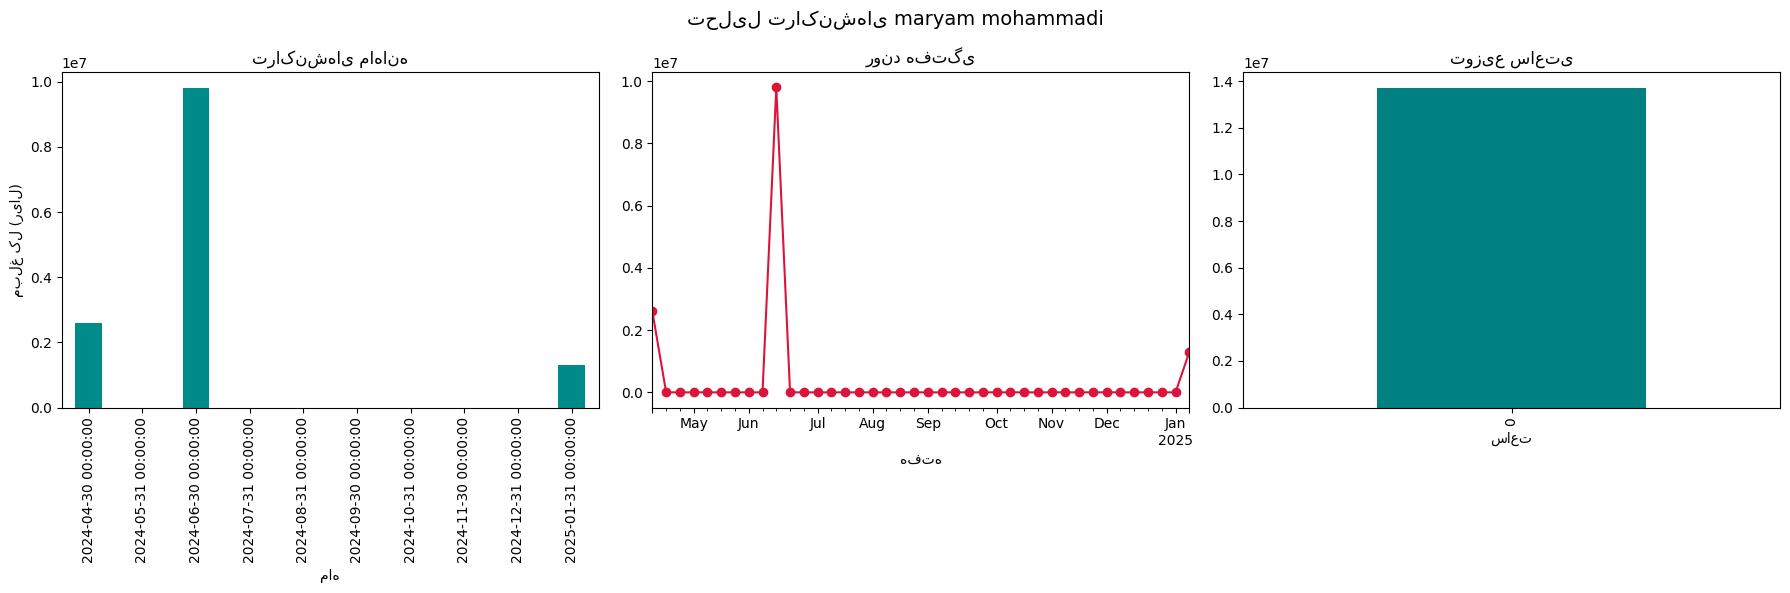


نتایج تحلیل:
بیشترین مبلغ ورودی: 9,800,000 ریال
بیشترین مبلغ خروجی: 600,000 ریال
میانگین ورودی: 4,366,666.67 ریال
میانگین خروجی: 600,000.00 ریال
انحراف معیار ورودی: 3,919,467.08
انحراف معیار خروجی: 0.00

═════════ تحلیل پیشرفته ═════════
فراوانی ترین مبلغ ورودی: 700,000 ریال
فراوانی ترین مبلغ خروجی: 600,000 ریال
شلوغ‌ترین روز: 2024-06-12
بیشترین مبلغ روزانه: 9,800,000 ریال
بیشترین تعداد تراکنش روزانه: 2

مشتری 2 در گیشه 3


C:\Users\ML\AppData\Local\Temp\ipykernel_12516\1664732890.py:173: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = customer_data.resample('M', on='date')['amount'].sum()


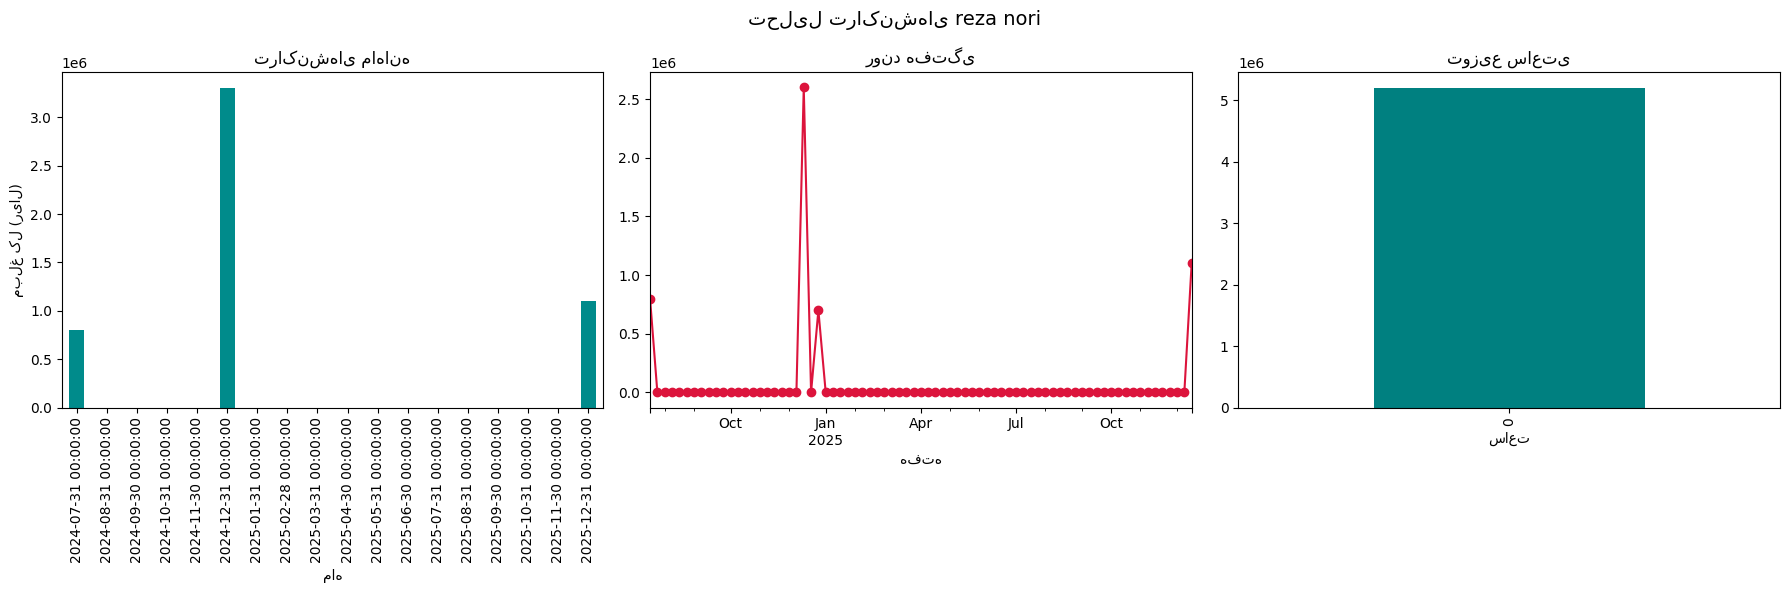


نتایج تحلیل:
بیشترین مبلغ ورودی: 0 ریال
بیشترین مبلغ خروجی: 2,600,000 ریال
میانگین ورودی: 0.00 ریال
میانگین خروجی: 1,300,000.00 ریال
انحراف معیار ورودی: 0.00
انحراف معیار خروجی: 764,852.93

═════════ تحلیل پیشرفته ═════════
فراوانی ترین مبلغ ورودی: 0 ریال
فراوانی ترین مبلغ خروجی: 700,000 ریال
شلوغ‌ترین روز: 2024-12-10
بیشترین مبلغ روزانه: 2,600,000 ریال
بیشترین تعداد تراکنش روزانه: 1

مشتری 3 در گیشه 2


In [ ]:
# نهایی 2و3
import os
import sys
import time
import random
from queue import Queue
from pydub import AudioSegment
import pyaudio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # برای نمودارهای حرفه‌ای

# تنظیمات
NUM_CUSTOMERS = 10
NUM_COUNTERS = 5
numbers_folder = "D:/aiocup/challesh_3/customer"
counters_folder = "D:/aiocup/challesh_3/gisha"
delay_time = 15  # مدت زمان تاخیر بین اعلام‌ها (به ثانیه)


# بارگذاری داده‌ها و تعیین جداکننده
df = pd.read_csv(r'D:\aiocup\mahbueh_mirshekar\chalesh3\fish6.csv', delimiter='\x1b')
df.columns = df.columns.str.strip()

# تابع پخش صدا
def play_audio(file_path):
    """پخش فایل صوتی با PyAudio"""
    try:
        audio = AudioSegment.from_file(file_path)
        audio = audio.set_channels(1).set_frame_rate(44100)
        
        p = pyaudio.PyAudio()
        stream = p.open(format=p.get_format_from_width(audio.sample_width),
                        channels=audio.channels,
                        rate=audio.frame_rate,
                        output=True)
        
        stream.write(audio.raw_data)
        stream.stop_stream()
        stream.close()
        p.terminate()
        
    except Exception as e:
        print(f"خطا در پخش صدا: {str(e)}")
        sys.exit(1)

# درخواست اطلاعات مشتری
def get_customer_info():
    """پرسیدن اسم و فامیل از کاربر"""
    first_name = input("لطفاً نام شخص را وارد کنید: ").strip()
    last_name = input("لطفاً نام خانوادگی شخص را وارد کنید: ").strip()
    return f"{first_name} {last_name}"

# بررسی وجود فایل‌ها
def validate_files():
    """بررسی وجود فایل‌های صوتی"""
    errors = []
    for i in range(1, NUM_CUSTOMERS + 1):
        path = os.path.join(numbers_folder, f"Voice {i:03}.mp3")
        if not os.path.exists(path):
            errors.append(f"فایل مشتری {i} یافت نشد: {path}")
    for i in range(11, 16):
        path = os.path.join(counters_folder, f"Voice {i:03}.mp3")
        if not os.path.exists(path):
            errors.append(f"فایل گیشه {i-10} یافت نشد: {path}")
    if errors:
        print("\n".join(errors))
        sys.exit(1)

# پخش اعلامیه
def play_announcement(customer, counter):
    """پخش ترکیب صداهای مشتری و گیشه"""
    customer_file = os.path.join(numbers_folder, f"Voice {customer:03}.mp3")
    counter_file = os.path.join(counters_folder, f"Voice {counter+10:03}.mp3")
    play_audio(customer_file)
    play_audio(counter_file)

     # تاخیر قبل از اعلام بعدی
    time.sleep(delay_time)  # تاخیر به ثانیه




# شبیه‌سازی سرویس
def simulate_service(queue):
    """مدیریت صف و پردازش مشتریان"""
    while not queue.empty():
        customer, counter = queue.get()
        print(f"\n{'='*30}\nمشتری {customer} در گیشه {counter}")
        play_announcement(customer, counter)
        
        customer_name = get_customer_info()
        result = find_customer_info(customer_name)
        
        # نمایش نتایج
        if isinstance(result, dict):
            print(f"\nنتایج تحلیل:")
            print(f"بیشترین مبلغ ورودی: {result.get('max_receive', 0):,} ریال")
            print(f"بیشترین مبلغ خروجی: {result.get('max_pay', 0):,} ریال")
            print(f"میانگین ورودی: {result.get('avg_receive', 0):,.2f} ریال")
            print(f"میانگین خروجی: {result.get('avg_pay', 0):,.2f} ریال")
            print(f"انحراف معیار ورودی: {result.get('std_receive', 0):,.2f}")
            print(f"انحراف معیار خروجی: {result.get('std_pay', 0):,.2f}")
            
            # تحلیل پیشرفته
            print("\n═════════ تحلیل پیشرفته ═════════")
            print(f"فراوانی ترین مبلغ ورودی: {result.get('most_frequent_receive', 0):,} ریال")
            print(f"فراوانی ترین مبلغ خروجی: {result.get('most_frequent_pay', 0):,} ریال")
            print(f"شلوغ‌ترین روز: {result.get('busiest_day', 'بدون داده')}")
            print(f"بیشترین مبلغ روزانه: {result.get('max_daily_total', 0):,} ریال")
            print(f"بیشترین تعداد تراکنش روزانه: {result.get('max_daily_count', 0)}")
            
            if result.get('error'):
                print(f"\n⚠️ خطا: {result['error']}")
        else:
            print("خطای ناشناخته در پردازش داده‌ها")

# جستجو و تحلیل اطلاعات مشتری
def find_customer_info(customer_name):
    """پردازش داده‌های مشتری و تولید گزارش"""
    try:
        # جستجوی دقیق مشتری
        mask = df['customer_name'].str.strip().str.lower() == customer_name.strip().lower()
        customer_data = df[mask].copy()
        
        if customer_data.empty:
            return {'error': 'مشتری یافت نشد', **{k:0 for k in [
                'max_receive', 'max_pay', 'avg_receive', 'avg_pay',
                'std_receive', 'std_pay', 'most_frequent_receive',
                'most_frequent_pay', 'max_daily_total', 'max_daily_count',
                'busiest_day'
            ]}}
        
        # تبدیل داده‌ها
        customer_data['amount'] = pd.to_numeric(customer_data['amount'], errors='coerce')
        customer_data['type'] = customer_data['type'].astype(int)
        customer_data['date'] = pd.to_datetime(customer_data['date'], format='%Y/%m/%d', errors='coerce')
        
        # تفکیک تراکنش‌ها
        receive_data = customer_data[customer_data['type'] == 1]
        pay_data = customer_data[customer_data['type'] == 0]

        # محاسبات آماری
        stats = {
            'max_receive': np.nanmax(receive_data['amount']) if not receive_data.empty else 0,
            'max_pay': np.nanmax(pay_data['amount']) if not pay_data.empty else 0,
            'avg_receive': np.nanmean(receive_data['amount']).round(2) if not receive_data.empty else 0,
            'avg_pay': np.nanmean(pay_data['amount']).round(2) if not pay_data.empty else 0,
            'std_receive': np.nanstd(receive_data['amount']).round(2) if not receive_data.empty else 0,
            'std_pay': np.nanstd(pay_data['amount']).round(2) if not pay_data.empty else 0,
            
            # تحلیل پیشرفته
            'most_frequent_receive': receive_data['amount'].mode()[0] if not receive_data.empty else 0,
            'most_frequent_pay': pay_data['amount'].mode()[0] if not pay_data.empty else 0,
            'error': None
        }
        
        # تحلیل روزانه
        daily_transactions = customer_data.groupby('date')['amount'].agg(['sum', 'count'])
        stats.update({
            'max_daily_total': daily_transactions['sum'].max() if not daily_transactions.empty else 0,
            'max_daily_count': daily_transactions['count'].max() if not daily_transactions.empty else 0,
            'busiest_day': daily_transactions['sum'].idxmax().strftime('%Y-%m-%d') if not daily_transactions.empty else 'بدون داده'
        })
        
        # نمودارهای زمانی
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"تحلیل تراکنش‌های {customer_name}", fontsize=14)
        
        # نمودار ماهانه
        plt.subplot(1, 3, 1)
        monthly = customer_data.resample('M', on='date')['amount'].sum()
        monthly.plot(kind='bar', color='darkcyan')
        plt.title('تراکنش‌های ماهانه')
        plt.xlabel('ماه')
        plt.ylabel('مبلغ کل (ریال)')
        
        # نمودار هفتگی
        plt.subplot(1, 3, 2)
        weekly = customer_data.resample('W', on='date')['amount'].sum()
        weekly.plot(kind='line', marker='o', color='crimson')
        plt.title('روند هفتگی')
        plt.xlabel('هفته')
        
        # نمودار ساعتی (اگر داده وجود دارد)
        plt.subplot(1, 3, 3)
        try:
            customer_data['hour'] = customer_data['date'].dt.hour
            hourly = customer_data.groupby('hour')['amount'].sum()
            hourly.plot(kind='bar', color='teal')
            plt.title('توزیع ساعتی')
            plt.xlabel('ساعت')
        except:
            plt.title('داده ساعتی موجود نیست')
        
        plt.tight_layout()
        plt.show()
        
        return stats
    
    except Exception as e:
        return {'error': f'خطای سیستمی: {str(e)}', **{k:0 for k in [
            'max_receive', 'max_pay', 'avg_receive', 'avg_pay',
            'std_receive', 'std_pay', 'most_frequent_receive',
            'most_frequent_pay', 'max_daily_total', 'max_daily_count',
            'busiest_day'
        ]}}

# اجرای اصلی
def main():
    validate_files()
    q = Queue()
    [q.put((i, random.randint(1, 5))) for i in range(1, 11)]
    simulate_service(q)

if __name__ == "__main__":
    try:
        from pydub import AudioSegment
        import pyaudio
    except ImportError:
        print("نصب وابستگی‌ها...")
        import subprocess
        subprocess.run([sys.executable, "-m", "pip", "install", "pydub", "pyaudio"])
    
    main()